In [30]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
label = []
numberLine = 0
message = []
with open('train.txt', 'r') as f:
    for line in f:
        set_message = line.split('\r')

In [31]:
set_message

['-1 Ghe goi dau loai 1 chinh hang giam gia con hang cong ty chinh hang giam gia con thoi gian khuyen mai het ngay luu y',
 '1 Anh thay em tuoi tho du doi a phet day. Viet ve sau phong van ho hoi day. Se co cam giac than thien',
 '-1 Chuc mung 093 xxx nhan duoc bai hat Vip "Luc moi yeu" tu mot nguoi ban ten H tang. De nghe bai hat va loi nhan duoc ghi am soan: VIP gui 7799',
 '1 Troi dep thi bao troi dep, u ko dien den muc i dau. Co 1 it nc mat roi. Hoho minh chua bi lanh cam :v',
 '1 Ranh tao nho chut viec',
 '-1 Nhan dip ra mat tang Quy khach SBC se du doan trung ...',
 '-1 Ban duoc tang Tuyen tap 500 GAME ONLINE chon loc cuc hay',
 '1 ko phai ninh dam. tu nhien nghi ra de nt ah',
 '1 Duoc roi dang nao cung phai qua ben do nop don. Haizzzzz sao ma bao luu cung thay tiec qua.suy nghi may hnay roi',
 '1 May dang o dau the',
 '-1 Xin cam on va chuc mung ban cung 5585 ban khac voi cap 33-88 cua VD hom qua Hom nay VD mua tiep 1 cap cam ket an ca 2, co the an DB',
 '1 chac ko dau. ong anh 

In [32]:
label = []
line = [[] for i in range(100)]
print range(101)
print len(line)
print line
for i in range(len(set_message)):
    line[i] = set_message[i].split()    
    label.append(line[i][0])
    line[i].__delitem__(0)
print line
print label


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
100
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[['Ghe', 'goi', 'dau', 'loai', '1', 'chinh', 'hang', 'giam', 'gia', 'con', 'hang', 'cong', 'ty', 'chinh', 'hang', 'giam', 'gia', 'con', 'thoi', 'gian', 'khuyen', 'mai', 'het', 'ngay', 'luu', 'y'], ['

In [33]:
print(label)

['-1', '1', '-1', '1', '1', '-1', '-1', '1', '1', '1', '-1', '1', '1', '1', '1', '1', '-1', '1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '1', '1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '-1', '1', '-1', '1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '1', '1', '1', '-1', '-1', '1', '-1', '1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '1', '-1', '1', '1', '1', '1', '-1', '1', '-1', '-1', '1']


In [34]:
## noi cac phan tu trong cung mot cau thanh cau
for i in range(len(line)):
    line[i] = ' '.join(line[i])

In [35]:
line

['Ghe goi dau loai 1 chinh hang giam gia con hang cong ty chinh hang giam gia con thoi gian khuyen mai het ngay luu y',
 'Anh thay em tuoi tho du doi a phet day. Viet ve sau phong van ho hoi day. Se co cam giac than thien',
 'Chuc mung 093 xxx nhan duoc bai hat Vip "Luc moi yeu" tu mot nguoi ban ten H tang. De nghe bai hat va loi nhan duoc ghi am soan: VIP gui 7799',
 'Troi dep thi bao troi dep, u ko dien den muc i dau. Co 1 it nc mat roi. Hoho minh chua bi lanh cam :v',
 'Ranh tao nho chut viec',
 'Nhan dip ra mat tang Quy khach SBC se du doan trung ...',
 'Ban duoc tang Tuyen tap 500 GAME ONLINE chon loc cuc hay',
 'ko phai ninh dam. tu nhien nghi ra de nt ah',
 'Duoc roi dang nao cung phai qua ben do nop don. Haizzzzz sao ma bao luu cung thay tiec qua.suy nghi may hnay roi',
 'May dang o dau the',
 'Xin cam on va chuc mung ban cung 5585 ban khac voi cap 33-88 cua VD hom qua Hom nay VD mua tiep 1 cap cam ket an ca 2, co the an DB',
 'chac ko dau. ong anh dua di thi em moi di duoc. em

In [36]:
len(label)

100

In [37]:
len(line)

100

In [38]:
## chuyen doi list den DataFrame
import pandas as pd
message_Frame = pd.DataFrame({'label': label,
                               'message': line}) 

In [39]:
message_Frame

,label,message
0,-1,Ghe goi dau loai 1 chinh hang giam gia con han...
1,1,Anh thay em tuoi tho du doi a phet day. Viet v...
2,-1,"Chuc mung 093 xxx nhan duoc bai hat Vip ""Luc m..."
3,1,"Troi dep thi bao troi dep, u ko dien den muc i..."
4,1,Ranh tao nho chut viec
5,-1,Nhan dip ra mat tang Quy khach SBC se du doan ...
6,-1,Ban duoc tang Tuyen tap 500 GAME ONLINE chon l...
7,1,ko phai ninh dam. tu nhien nghi ra de nt ah
8,1,Duoc roi dang nao cung phai qua ben do nop don...
9,1,May dang o dau the


In [40]:
message_Frame.describe()

,label,message
count,100,100
unique,2,99
top,-1,Troi ret nam trong chan am vai. Dech muon di h...
freq,51,2


In [41]:
message_Frame.groupby('label').describe()

message
label                                                          
-1    count                                                  51
      unique                                                 51
      top     Cty chuyen cung cap binh ngam ruou sam han quo...
      freq                                                    1
1     count                                                  49
      unique                                                 48
      top     Troi ret nam trong chan am vai. Dech muon di h...
      freq                                                    2

In [42]:
message_Frame['length'] = message_Frame['message'].apply(len)
message_Frame.head()

,label,message,length
0,-1,Ghe goi dau loai 1 chinh hang giam gia con han...,115
1,1,Anh thay em tuoi tho du doi a phet day. Viet v...,99
2,-1,"Chuc mung 093 xxx nhan duoc bai hat Vip ""Luc m...",141
3,1,"Troi dep thi bao troi dep, u ko dien den muc i...",101
4,1,Ranh tao nho chut viec,22


In [43]:
message_Frame.describe()

,length
count,100.000000
mean,88.180000
std,48.022802
min,15.000000
25%,55.000000
50%,82.500000
75%,115.000000
max,270.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa01a43d390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa01a3b86d0>], dtype=object)

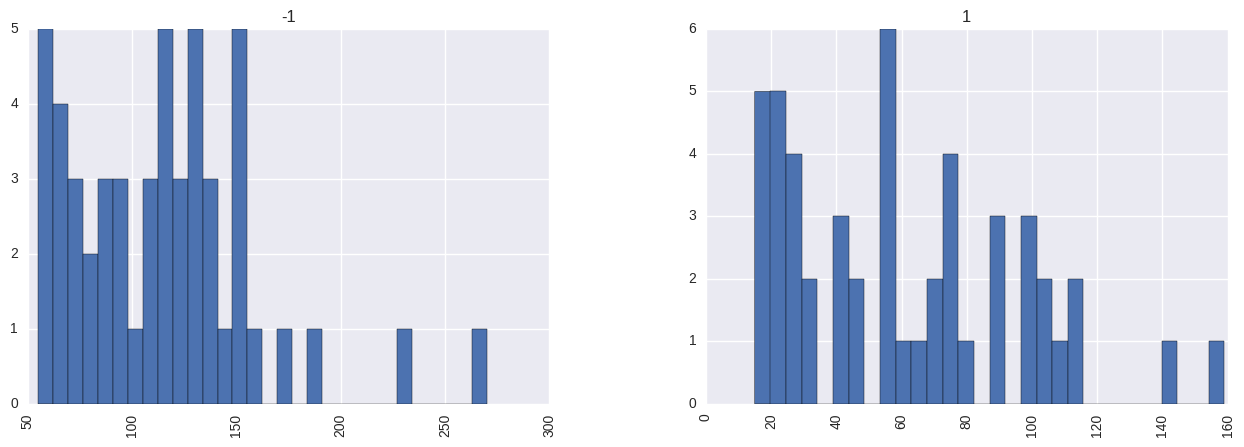

In [44]:
%matplotlib inline

# ve do thi histogram ve 
message_Frame.hist(by='label', column='length', bins=30, figsize=[15, 5])

In [45]:
x = message_Frame.message
y = message_Frame.label


In [46]:
from sklearn.model_selection import train_test_split

# chia tap ngu lieu ra lam 2 phan ti le 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=11)

In [47]:
x_train.shape

(75,)

In [48]:
x_test.shape

(25,)

In [49]:
vect = CountVectorizer()
# chuyen doi den vecto
X_train = vect.fit_transform(x_train)
# chuyen doi vecto
X_test = vect.transform(x_test)

In [50]:
# phan loai theo cac phuong phap
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [51]:
def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)
    
def predict(clf,X_test):
    return clf.predict(X_test)

In [52]:
# dinh nghia ten phan loai
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [53]:
# du doan va tinh do chinh xac
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))


In [54]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores'])
# them cot accuracy
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Accuracy (%)
SVM,0.88,88.0
RandomForest,0.80,80.0
GaussianNB,0.84,84.0
Adaboost,0.88,88.0
logistic,0.88,88.0
MultinomialNB,0.92,92.0
